In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten

Using TensorFlow backend.


In [4]:
max_features = 20000
# 20000번째로 많이 사용되는 단어까지만 데이터셋에 포함시킵니다. (즉 단어의 종류도 20000개라는 뜻입니다.)
text_max_words = 200
# 리뷰 당 단어 수를 200개로 제한합니다. 넘치는 단어들은 잘라냅니다.

In [6]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# x_* 변수는 영화 리뷰를 담는 리스트이고
# 각각의 리뷰는 단어들의 리스트입니다.
# y_* 변수는 영화 리뷰의 긍정 부정을 나타내는 값들의 리스트입니다.
# *_train 변수는 훈련 셋이고 *_test 셋은 테스트 셋 입니다
print(len(x_train), len(y_train), len(x_test), len(y_test))
# num_words 가 20000이라고 데이터셋이 20000개라는 뜻은 아닙니다.
# 데이터셋은 각각 25000개 입니다.
print(y_train)

25000 25000 25000 25000


In [6]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# 훈련 셋은 데이터 셋에서 20000개 까지,
# 검증(validation) 셋은 데이터 셋에서 5000개 까지로 나눕니다.
print(len(x_train), len(y_train), len(x_val), len(y_val))

for review in x_train:
    print(len(review))
# 현재는 각각의 리뷰의 단어 수가 모두 다릅니다.

In [7]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)
# 각 리뷰당의 단어 수를 모두 200개로 맞춥니다 부족한 단어들은 0으로 채워집니다. (padding)
for review in x_train:
    print(len(review))

In [8]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128)) # mlp 예제와 다르게 LSTM 레이어를 사용하는 모습입니다
# LSTM은 RNN의 일종으로 다른 모델과 달리 하나의 데이터 학습이 이전 데이터들의 학습의 영향을 받습니다
model.add(Dense(1, activation='sigmoid'))

W0810 05:52:48.276514 140084719765120 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 05:52:48.319827 140084719765120 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 05:52:48.330308 140084719765120 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 손실함수는 binary_crossentropy
# 옵티마이저는 adam
# 측정은 accuracy로 합니다

W0810 05:52:49.379846 140084719765120 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 05:52:49.492976 140084719765120 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0810 05:52:49.507753 140084719765120 deprecation.py:323] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))
# 훈련 셋으로 훈련하고, 검증 셋으로 검증합니다. 테스트 셋은 아직 사용하지 않습니다

W0810 05:52:53.382362 140084719765120 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 272s 14ms/step - loss: 0.4460 - acc: 0.7837 - val_loss: 0.3885 - val_acc: 0.8296
Epoch 2/25
20000/20000 [==============================] - 246s 12ms/step - loss: 0.2224 - acc: 0.9166 - val_loss: 0.3161 - val_acc: 0.8754
Epoch 3/25
20000/20000 [==============================] - 268s 13ms/step - loss: 0.1266 - acc: 0.9546 - val_loss: 0.3546 - val_acc: 0.8618
Epoch 4/25
20000/20000 [==============================] - 215s 11ms/step - loss: 0.1015 - acc: 0.9642 - val_loss: 0.4229 - val_acc: 0.8512
Epoch 5/25
20000/20000 [==============================] - 54s 3ms/step - loss: 0.0653 - acc: 0.9770 - val_loss: 0.4970 - val_acc: 0.8560
Epoch 6/25
20000/20000 [==============================] - 55s 3ms/step - loss: 0.0541 - acc: 0.9816 - val_loss: 0.6092 - val_acc: 0.8614
Epoch 7/25
20000/20000 [==============================] - 55s 3ms/step - loss: 0.0692 - acc: 0.9767 - val_loss: 0.5374 - 

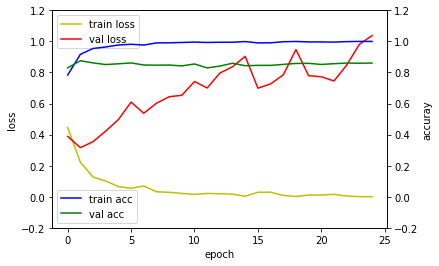

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')ㄴ
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [12]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)
# 한 번도 사용하지 않은 테스트 셋으로 모델의 성능을 측정합니다.

25000/25000 [==============================] - 14s 548us/step
## evaluation loss and_metrics ##
[1.1350847533035278, 0.8490799999809265]
